<a href="https://colab.research.google.com/github/MrezaFd/Tugas-Besar-ML-059-055-/blob/main/Repair%20ML_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files #import lib
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezafdz","key":"fd16295d7b817e274541292110c8f784"}'}

In [3]:
!mkdir -p ~/.kaggle #membuat directory bernama kaggle 
!cp kaggle.json ~/.kaggle/ #copy file kaggle.json upload tadi ke directory baru
!chmod 600 ~/.kaggle/kaggle.json #berikan izin untuk file kaggle.jsonv

In [4]:
#Unduh dataset
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 94% 305M/325M [00:06<00:00, 32.1MB/s]
100% 325M/325M [00:06<00:00, 50.6MB/s]


In [5]:
from zipfile import ZipFile
file_name = "skin-cancer-malignant-vs-benign.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [1]:
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
benign_train = '/content/train/benign'
malignant_train = '/content/train/malignant'

benign_test = '/content/test/benign'
malignant_test = '/content/test/malignant'


read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims_benign = [read(os.path.join(benign_train, filename)) for filename in os.listdir(benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(malignant_train, filename)) for filename in os.listdir(malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

ims_benign = [read(os.path.join(benign_test, filename)) for filename in os.listdir(benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(malignant_test, filename)) for filename in os.listdir(malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [3]:
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [4]:
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [5]:
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

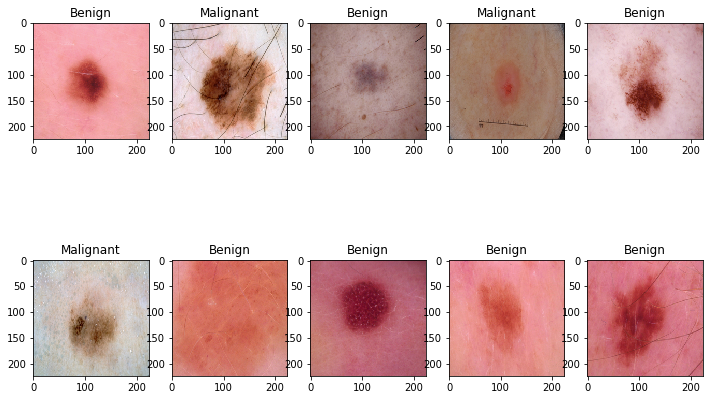

In [6]:
w=30
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 2

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [7]:
blue,green,red = cv2.split(X_train[i])
print(blue,green,red)

[[215 214 218 ... 216 210 215]
 [212 214 213 ... 214 213 215]
 [212 216 213 ... 215 217 215]
 ...
 [203 200 197 ... 193 196 196]
 [201 199 199 ... 192 193 199]
 [201 200 200 ... 195 193 196]] [[122 121 122 ... 132 123 122]
 [121 123 120 ... 132 130 127]
 [121 124 120 ... 129 129 128]
 ...
 [125 121 116 ... 114 117 119]
 [123 120 115 ... 110 114 119]
 [124 116 116 ... 111 111 116]] [[133 132 134 ... 147 139 141]
 [128 130 130 ... 144 140 141]
 [128 129 130 ... 142 145 144]
 ...
 [121 116 113 ... 119 120 125]
 [123 116 113 ... 122 120 128]
 [118 114 114 ... 124 123 125]]


In [8]:
pca = PCA(10)
pca1=PCA(50)
pca2=PCA(200)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

red_transformed1 = pca1.fit_transform(red)
red_inverted1 = pca1.inverse_transform(red_transformed1)

red_transformed2 = pca2.fit_transform(red)
red_inverted2 = pca2.inverse_transform(red_transformed2)

 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
green_transformed1 = pca1.fit_transform(green)
green_inverted1 = pca1.inverse_transform(green_transformed1)

green_transformed2 = pca2.fit_transform(green)
green_inverted2 = pca2.inverse_transform(green_transformed2)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

blue_transformed1 = pca1.fit_transform(blue)
blue_inverted1 = pca1.inverse_transform(blue_transformed1)

blue_transformed2 = pca2.fit_transform(blue)
blue_inverted2 = pca2.inverse_transform(blue_transformed2)

In [9]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
img_compressed1 = (np.dstack((red_inverted1, red_inverted1, red_inverted1))).astype(np.uint8)
img_compressed2 = (np.dstack((red_inverted2, red_inverted2, red_inverted2))).astype(np.uint8)

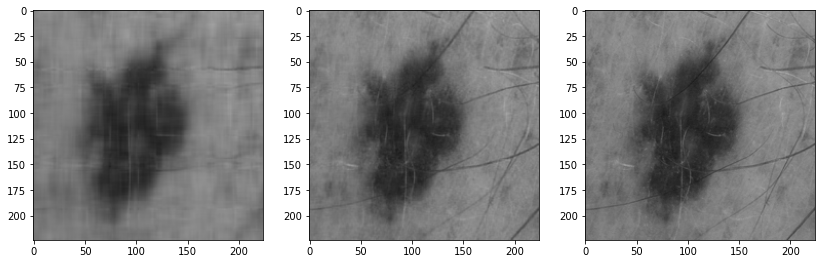

In [10]:
fig=plt.figure(figsize=(14, 10))
plt.subplot(2,3,1)
plt.imshow(img_compressed)
plt.subplot(2,3,2)
plt.imshow(img_compressed1)
plt.subplot(2,3,3)
plt.imshow(img_compressed2)

In [11]:
print(X_train.shape)
print(X_train.size)
print(len(X_train))

(2637, 224, 224, 3)
396942336
2637


In [12]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(
    y_train, num_classes=2, dtype='float32'
)
y_test=to_categorical(
    y_test, num_classes=2, dtype='float32'
)

In [13]:
import numpy as np
X_train = X_train/ 255
X_test = X_test/ 255

In [14]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, ReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from keras import regularizers

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',input_shape=(224,224,3),
                     activation= "sigmoid", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.3))   
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', 
                     activation ="sigmoid", kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss= BinaryCrossentropy(),optimizer=Adam(0.001), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

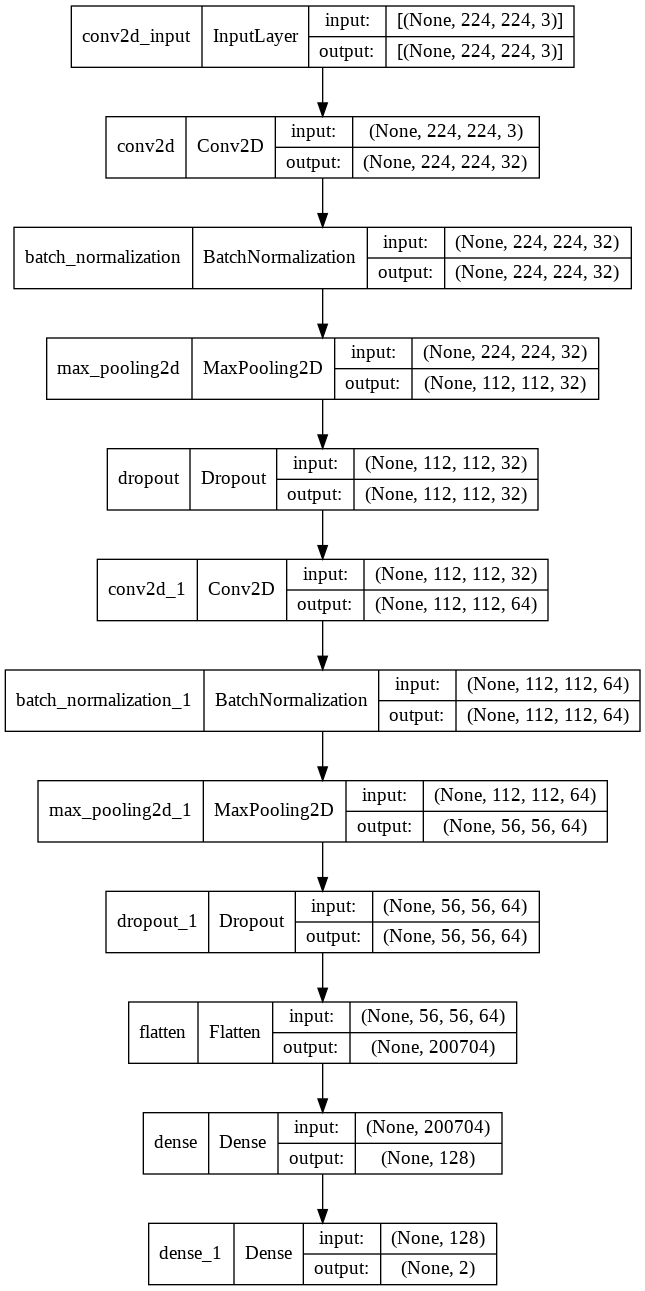

In [18]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [27]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [28]:
H1 = model.fit(X_train,y_train,verbose=1,epochs=150,validation_split=0.2)

Epoch 1/150
66/66 [==============================] - 12s 157ms/step - loss: 13.5523 - accuracy: 0.7141 - val_loss: 0.6938 - val_accuracy: 0.4735
Epoch 2/150
66/66 [==============================] - 9s 135ms/step - loss: 0.6406 - accuracy: 0.7364 - val_loss: 0.6885 - val_accuracy: 0.4735
Epoch 3/150
66/66 [==============================] - 9s 136ms/step - loss: 0.5167 - accuracy: 0.7539 - val_loss: 0.6960 - val_accuracy: 0.4735
Epoch 4/150
66/66 [==============================] - 9s 135ms/step - loss: 0.5040 - accuracy: 0.7477 - val_loss: 0.6377 - val_accuracy: 0.6837
Epoch 5/150
66/66 [==============================] - 9s 135ms/step - loss: 0.4482 - accuracy: 0.7795 - val_loss: 1.2593 - val_accuracy: 0.7746
Epoch 6/150
66/66 [==============================] - 9s 135ms/step - loss: 0.4405 - accuracy: 0.7743 - val_loss: 2.0708 - val_accuracy: 0.7879
Epoch 7/150
66/66 [==============================] - 9s 143ms/step - loss: 0.4311 - accuracy: 0.7729 - val_loss: 3.1971 - val_accuracy: 0.77

NameError: ignored

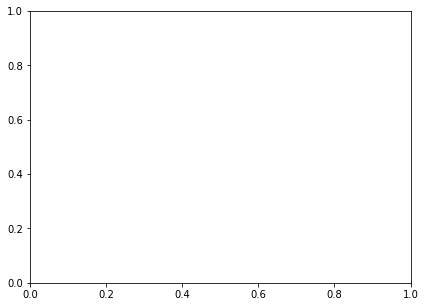

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [31]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

21/21 [==============================] - 1s 59ms/step - loss: 4.5258 - accuracy: 0.7652
Loss of the model is -  4.525805950164795
21/21 [==============================] - 1s 42ms/step - loss: 4.5258 - accuracy: 0.7652
Accuracy of the model is -  76.51515007019043 %


In [29]:
from keras.models import load_model
model.save('skincancermodelbest.h5')

In [32]:
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_test) 
Y_pred=np.argmax(Y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[311  49]
 [106 194]]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, Y_pred, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

                    precision    recall  f1-score   support

  Benign (Class 0)       0.75      0.86      0.80       360
Malignant(Class 1)       0.80      0.65      0.71       300

          accuracy                           0.77       660
         macro avg       0.77      0.76      0.76       660
      weighted avg       0.77      0.77      0.76       660



In [34]:
correct = np.nonzero(Y_pred == y_test)[0]
incorrect = np.nonzero(Y_pred != y_test)[0]

**Test Model Sendiri**


```
# This is formatted as code
```

**

In [16]:
model3 = Sequential()

model3.add(InputLayer(input_shape=[224,224,3]))
model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(BatchNormalization())

model3.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(2, activation='softmax'))

In [17]:
print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 111, 111, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

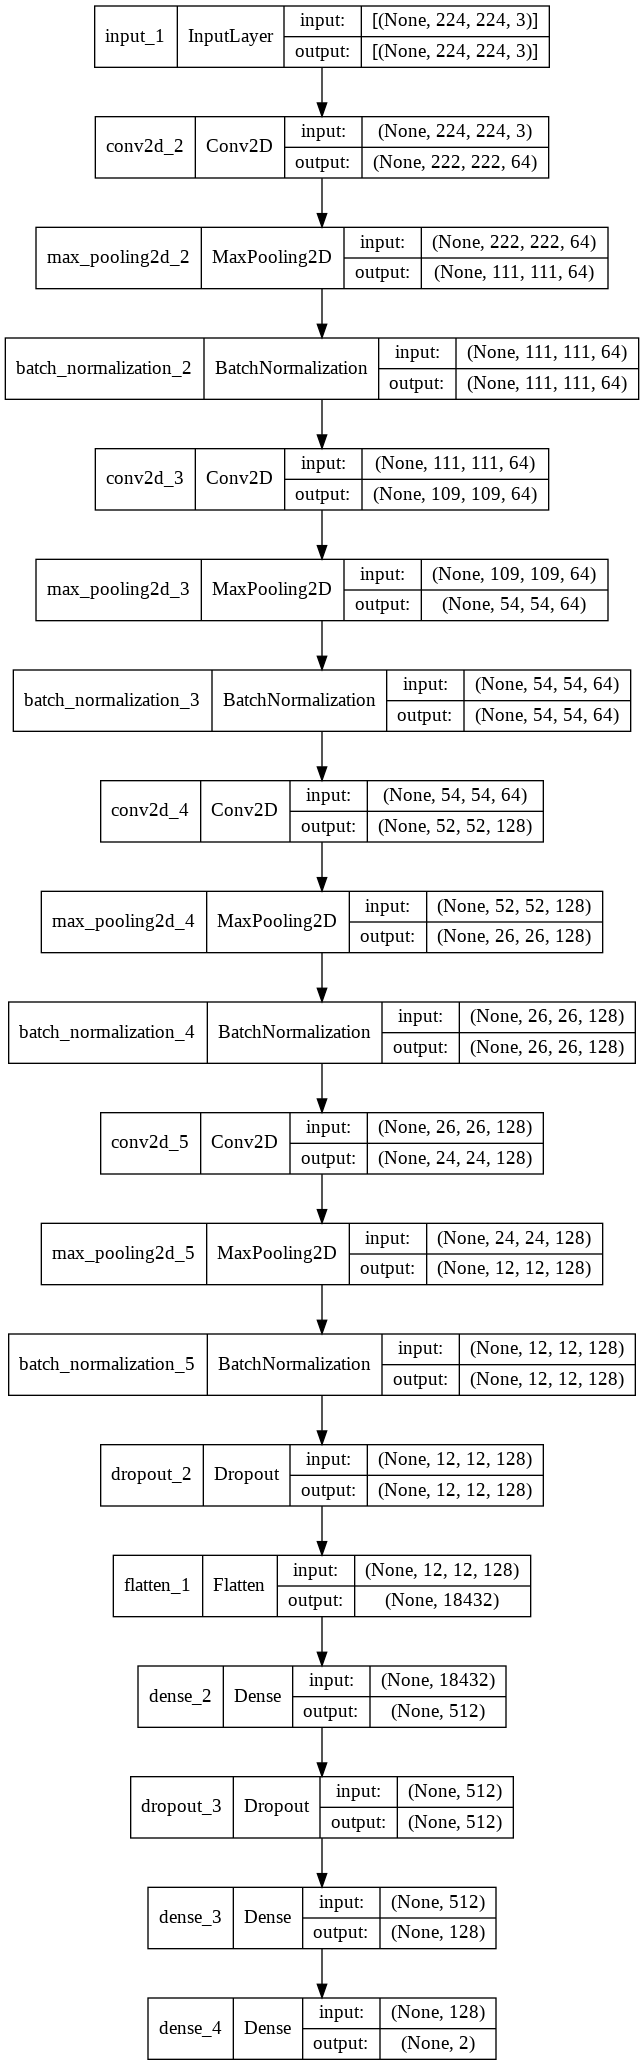

In [18]:
tf.keras.utils.plot_model(
    model3, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [19]:
# Compile model
from tensorflow.keras.optimizers import Adam

model3.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
H31 = model3.fit(X_train,y_train,verbose=1,epochs=150,validation_split=0.2)

Epoch 1/150
66/66 [==============================] - 12s 185ms/step - loss: 0.3776 - acc: 0.8293 - val_loss: 0.5145 - val_acc: 0.7670
Epoch 2/150
66/66 [==============================] - 11s 162ms/step - loss: 0.3667 - acc: 0.8279 - val_loss: 0.4717 - val_acc: 0.7670
Epoch 3/150
66/66 [==============================] - 11s 165ms/step - loss: 0.3452 - acc: 0.8279 - val_loss: 0.3630 - val_acc: 0.8390
Epoch 4/150
66/66 [==============================] - 11s 161ms/step - loss: 0.3258 - acc: 0.8540 - val_loss: 0.4789 - val_acc: 0.7670
Epoch 5/150
66/66 [==============================] - 11s 161ms/step - loss: 0.3070 - acc: 0.8473 - val_loss: 0.6185 - val_acc: 0.6496
Epoch 6/150
66/66 [==============================] - 11s 169ms/step - loss: 0.3021 - acc: 0.8502 - val_loss: 0.7537 - val_acc: 0.6231
Epoch 7/150
66/66 [==============================] - 11s 162ms/step - loss: 0.3075 - acc: 0.8525 - val_loss: 0.4673 - val_acc: 0.7955
Epoch 8/150
66/66 [==============================] - 11s 161ms

In [25]:
from keras.models import load_model
model3.save('thebestmodel3.h5')